In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simulate(G, N, M, P, V, A, dt, steps, fsize, clim, save=False):
    
    def force(G, M, m, P, p):
        return G * M * m * (p - P) / np.sum((p - P) ** 2) ** 1.5
    
    pos, vel, acc = np.zeros((steps, N, 3)), np.zeros((steps, N, 3)), np.zeros((steps, N, 3))
    pos[0], vel[0], acc[0] = P, V, A
    
    for i in range(1, steps):
        pos[i] = pos[i - 1] + vel[i - 1] * dt
        for j in range(N):
            for k in range(j + 1, N):
                F = force(G, M[j], M[k], pos[i][j], pos[i][k])
                acc[i][j], acc[i][k] = acc[i][j] + F / M[j], acc[i][k] - F / M[k]
        vel[i] = vel[i - 1] + acc[i] * dt
        
    fig = plt.figure(figsize=(fsize, fsize))
    ax = plt.axes(xlim=(-clim, clim), ylim=(-clim, clim), zlim=(-clim, clim), projection='3d')
    ax.grid(False)
    
    for i in range(N):
        ax.plot3D(pos[:, i, 0], pos[:, i, 1], pos[:, i, 2], c=np.random.rand(3))
        
    plt.show()
    plt.close(fig)
    
    if save:
        fig = plt.figure(figsize=(fsize, fsize))
        c = np.random.rand(N, 3)
        for i in range(steps):
            ax = plt.axes(xlim=(-clim, clim), ylim=(-clim, clim), zlim=(-clim, clim), projection='3d')
            ax.grid(False)
            plot = ax.scatter(pos[i, :, 0], pos[i, :, 1], pos[i, :, 2], c=c)
            plt.savefig(f'.../iteration_{i}')
            ax.clear()
        plt.close(fig)
        print('saved!')
    
    return pos, vel, acc

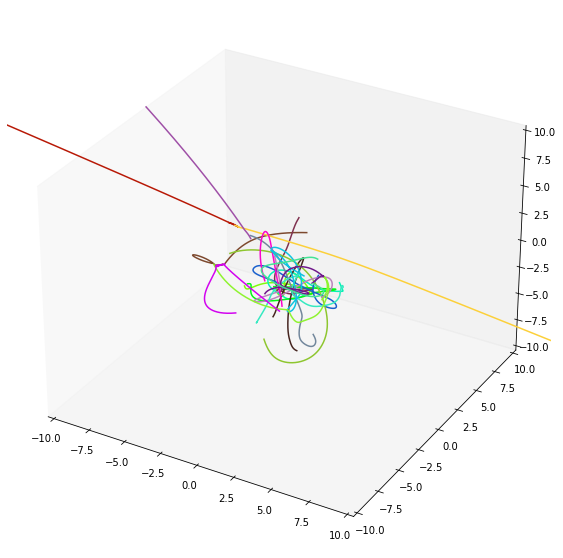

In [3]:
G = 3e-2 # gravitational constant
N = 20 # number of bodies
M = np.abs(np.random.uniform(0.5, 1.5, (N, 3))) # masses 
P = np.random.uniform(-4, 4, (N, 3)) # initial positions
V = np.random.uniform(-0.2, 0.2, (N, 3)) # initial velocities
A = np.zeros((N, 3)) # initial accelerations
dt = 5e-2 # time step size
steps = 1000 # iterations
fsize = 10 # figure size
clim = 10 # coordinate bounds
pos, vel, acc = simulate(G, 
                         N=N,
                         M=M,
                         P=P, 
                         V=V,
                         A=A,
                         dt=dt,
                         steps=steps, 
                         fsize=fsize,
                         clim=clim,
                         save=False)

In [4]:
pos

array([[[ -2.64457718,  -0.45234809,  -2.04143307],
        [ -3.77640512,  -2.33365206,   0.8686252 ],
        [ -0.85820154,   2.9956471 ,   2.66709283],
        ...,
        [ -2.23208347,  -0.3708957 ,   2.41654381],
        [ -0.47745381,   3.97038116,  -3.91692023],
        [  2.37287142,  -0.42630382,   2.32888691]],

       [[ -2.63644567,  -0.46197115,  -2.04251464],
        [ -3.78628026,  -2.33394336,   0.86824979],
        [ -0.85395207,   2.98805809,   2.67314182],
        ...,
        [ -2.23674669,  -0.37005169,   2.42488833],
        [ -0.47087361,   3.96575589,  -3.90713086],
        [  2.36819919,  -0.42610284,   2.33076885]],

       [[ -2.62819   ,  -0.47166849,  -2.04344759],
        [ -3.79612445,  -2.33420871,   0.86787109],
        [ -0.84970189,   2.98044263,   2.67917001],
        ...,
        [ -2.241447  ,  -0.36922022,   2.43325278],
        [ -0.46428594,   3.96109992,  -3.8973174 ],
        [  2.36350101,  -0.42589945,   2.3325986 ]],

       ...,

      

In [5]:
vel

array([[[ 0.16263019, -0.19246119, -0.02163156],
        [-0.19750278, -0.00582593, -0.00750814],
        [ 0.08498931, -0.15178035,  0.12097973],
        ...,
        [-0.09326452,  0.01688019,  0.16689028],
        [ 0.13160394, -0.09250549,  0.19578734],
        [-0.09344452,  0.00401959,  0.03763896]],

       [[ 0.16511353, -0.19394688, -0.01865893],
        [-0.19688375, -0.00530697, -0.00757401],
        [ 0.08500359, -0.15230906,  0.12056384],
        ...,
        [-0.09400621,  0.01662952,  0.1672891 ],
        [ 0.13175341, -0.09311936,  0.19626913],
        [-0.09396359,  0.00406786,  0.03659494]],

       [[ 0.16765942, -0.19540528, -0.01557202],
        [-0.19626406, -0.00478989, -0.00763902],
        [ 0.08501633, -0.1528382 ,  0.12014751],
        ...,
        [-0.09477071,  0.01637787,  0.16771151],
        [ 0.1319043 , -0.09373454,  0.19675105],
        [-0.09448341,  0.00411481,  0.03554933]],

       ...,

       [[ 0.19864185,  0.22957616,  0.44987891],
        [ 0

In [6]:
acc

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 4.96667131e-02, -2.97137186e-02,  5.94527200e-02],
        [ 1.23805555e-02,  1.03792334e-02, -1.31741288e-03],
        [ 2.85624832e-04, -1.05741885e-02, -8.31792610e-03],
        ...,
        [-1.48337987e-02, -5.01338493e-03,  7.97642400e-03],
        [ 2.98927425e-03, -1.22773790e-02,  9.63581201e-03],
        [-1.03814940e-02,  9.65350210e-04, -2.08804188e-02]],

       [[ 5.09178636e-02, -2.91680129e-02,  6.17380555e-02],
        [ 1.23937610e-02,  1.03417026e-02, -1.30017737e-03],
        [ 2.54696043e-04, -1.05827753e-02, -8.32653618e-03],
        ...,
        [-1.52899215e-02, -5.03294770e-03,